# Hodan Mohamed Abdi SBA23416_Data Preperation_CA1

# Characterisation of the data set- aps_failure_set (1).csv

Introduction: My assignment i have been asked by Haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes.

*The dataset’s positive class consists of component failures for a specific component of the APS system.

*The negative class consists of trucks with failures for components not related to the APS

*The data consists of a subset of all available data, selected by experts.

*The main aim of this analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must be generated using python.

The companies CTO also requires that i must include rationalize all the decisions that you have made in the report.

Step 1 of the assignment is to: use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report with my findings as following step below:

1.Characterisation of the data set: Which incldues the size; How many number of attributes; if there are or has/does not have missing values, Also listing the number of observations. and idenfying what these Characterisation mean.

I will be importing the dataset with Panda library to verify what are the specific's

Step 2:Exploratory Data Analysis (EDA) to get a better understanding of the data-set by summarizing its main characteristics and often plotting them visually.

I have come to understand that this step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots.

Step 3: Principal Component Analysis, In this section, i will be explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering,

Step 4:Final Part: Curse of Dimensionality, I will end the assignment with my finding toward my analysis.

# 1. Characterisation of the data set

In [1]:
import pandas as pd
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() 

In [2]:
aps_failure_df =pd.read_csv ("aps_failure_set (2).csv")

Size of the dataset

In [3]:
size = aps_failure_df.shape
print("Dataset Size:", size)

Dataset Size: (60000, 171)


Data Information

In [4]:
aps_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
print("The data set has {} rows and {} columns".format(aps_failure_df.shape[0], aps_failure_df.shape[1]))
display(aps_failure_df.describe())
display(aps_failure_df.head())
print(aps_failure_df.dtypes.value_counts())

The data set has 60000 rows and 171 columns


,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


object    170
int64       1
dtype: int64


# Identfying Atributes

In [6]:
num_attributes = len(aps_failure_df.columns)
print("Number of Attributes:", num_attributes)

Number of Attributes: 171


In [7]:
num_observations = aps_failure_df.shape[0]
print("Number of Observations:", num_observations)

Number of Observations: 60000


# Idenfying what these Characterisation mean.

# Identfying Dublicate dataset

In [8]:
aps_failure_df.duplicated().sum()

0

# 2. Exploratory Data Analysis

# Identyfing Missing data: 

In [9]:
print(aps_failure_df.isnull().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


# Selecting Columns

In [10]:
aps_failure_df.count() 

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [11]:
aps_failure_df.describe(include ="object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


As displayed above data, I have identified that there are dataset with NA which i have conclued to be a unique value.

In [12]:
aps_failure_df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

In [13]:
aps_failure_df["ab_000"].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: ab_000, Length: 60000, dtype: bool>

In [14]:
aps_failure_df["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [15]:
aps_failure_df["ad_000"].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: ad_000, Length: 60000, dtype: bool>

In [16]:
missing_values=["na"]

In [17]:
aps_failure_df=pd.read_csv("aps_failure_set (2).csv" , na_values=missing_values)

My next step to chaning the missing values to number will be as followed.

In [27]:
missing_value=aps_failure_df.isnull().sum()

In [28]:
print(missing_value)

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


As you can see that the missing valued has now been replaced with unique values with the application of using EDA method, Although that been said, With the remaining columns that are no longer required can be removed.

Steps with removing the columns are as follow:

In [20]:
aps_failure_df=aps_failure_df.drop(aps_failure_df.columns[aps_failure_df.isnull().mean()>10])

In [21]:
aps_failure_df.fillna(aps_failure_df.median(),inplace=True)

C:\Users\hodanabdi\AppData\Local\Temp\ipykernel_20128\189073769.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  aps_failure_df.fillna(aps_failure_df.median(),inplace=True)


In [22]:
aps_failure_df.describe

<bound method NDFrame.describe of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2       neg   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    

BoxPlot Diagram:

Exploratory Data Analysis or (EDA) is understanding the data set by summarizing its main characteristics and often plotting them visually. This step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots and many more.

Through the process of EDA, we can also refine the problem statement or definition of our problem.

<Axes: >

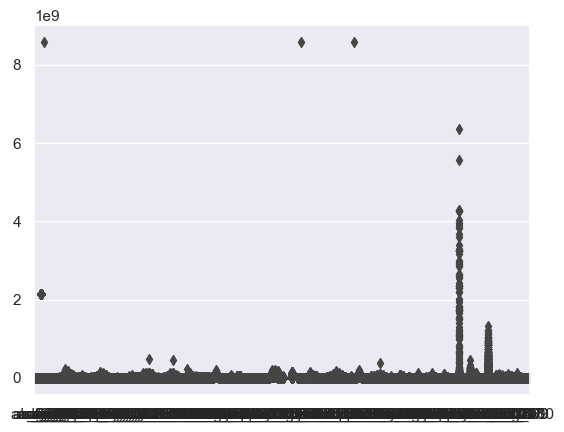

In [23]:
sns.boxplot(data=aps_failure_df)

What data are we exploring today?

We are going to look at a data set on cars called “cardata.csv”.

The data contains more than 6,000 rows and more than 171 columns which have features

# Step 4: Principal Component Analysis

 Principal Component Analysis, In this section, i will be explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering,

In [25]:
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
aps_failure_df["class"]=L_encoder.fit_transform(aps_failure_df["class"])
aps_failure_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [26]:
from sklearn.decomposition import PCA

In [ ]:
aps_no_label = aps_failure_df.drop(aps_failure_df["class"])
pca = PCA().fit(aps_failure_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

# Step 5:Curse of Dimensionality

I will end the assignment with my finding toward my analysis.

# Reference